In [1]:
import random
import soundfile
import pandas as pd
import telegram.ext
from config import *

In [2]:
random.seed(42)

In [2]:
df = pd.read_csv('timit/spkrinfo.csv')
df['age'] = df['age'].astype(int)
df['num'] = df.groupby('age')['age'].transform('count')
df['prob'] = 1 / len(df['age'].unique()) / df['num']

In [3]:
print(len(df.index), len(df['prob']), df['prob'].sum())
print(len(df['prob'].unique()), len(df['num'].unique()))

6300 6300 1.0
21 21


In [622]:
df.loc[np.random.choice(df.index, 1, p=df['prob'])[0]]

id                                MPG0
sex                                  F
rec_date                      04/08/86
birth_date                    12/23/32
age                                 54
audio         TRAIN/DR5/FMPG0/SX72.ogg
duration                      2.406438
num                                 30
prob                          0.000813
Name: 3969, dtype: object

In [289]:
age = random.choice(df['age'].unique())
idx = random.choice(df[df['age'] == age].index)
df.loc[idx, 'age']

40

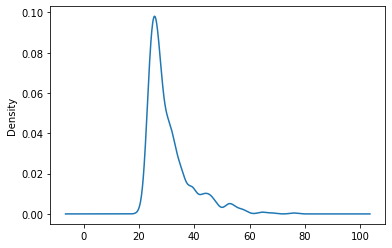

In [654]:
df['age'].plot.density();

In [ ]:
# import IPython
# idx = random.randint(0, len(df) - 1)
# age, path = df.loc[idx, ['age','audio']]
# audio, sr = soundfile.read('timit/' + path)
# IPython.display.Audio(audio, rate=sr)

In [4]:
user_last_idx = {}

In [5]:
def handle_text(update, context):

    user = update.message.from_user
    
    if user['id'] in user_last_idx:
        idx = user_last_idx[user['id']]
        sex, age = df.loc[idx, ['sex','age']]
        context.bot.send_message(chat_id, f'{sex}, {int(age)}')
    
    idx = random.randint(0, len(df) - 1)
    path = 'timit/' + df.loc[idx, 'audio']
    
    with open(path, 'rb') as fd:
        context.bot.send_audio(user['id'], fd)
        
    if user['id'] != TG_BOT_OWNER_ID:
        msg = f"@{user['username']} {user['id']}"
        context.bot.send_message(TG_BOT_OWNER_ID, msg)
    
    user_last_idx[user['id']] = idx

In [ ]:
h = telegram.ext.MessageHandler
vt = telegram.ext.Filters.text 
u = telegram.ext.Updater(TG_BOT_TOKEN)
u.dispatcher.add_handler(h(vt, handle_text))
u.start_polling(); u.idle()